<a href="https://colab.research.google.com/github/m-rafiul-islam/driver-behavior-model/blob/main/emperical_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis 


In [1]:
import pandas as pd

[3 Ways to Load CSV files into Colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2)%20From%20a%20local%20drive&text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).)




In [2]:
raw_data_link = 'https://raw.githubusercontent.com/m-rafiul-islam/driver-behavior-model/main/RAllCarDataTime350.csv'
car_data = pd.read_csv(raw_data_link) 

In [3]:
# car_data.head()

In [4]:
car_data

,time,nthcar,speed,spaceheadway,accelaretion,relativevelocity
0,0.0,1,7.2289,12.209,0.220200,-0.90701
1,0.1,1,7.2298,12.117,0.008769,-0.92513
2,0.2,1,7.1965,12.025,-0.333190,-0.91394
3,0.3,1,7.1247,11.938,-0.717440,-0.87312
4,0.4,1,7.0152,11.857,-1.095500,-0.80384
...,...,...,...,...,...,...
349995,34.6,1000,6.1081,19.781,-0.541750,1.34520
349996,34.7,1000,6.0338,19.927,-0.742640,1.46200
349997,34.8,1000,5.9423,20.085,-0.915130,1.58220
349998,34.9,1000,5.8498,20.254,-0.924930,1.68960


In [5]:
car_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              350000 non-null  float64
 1   nthcar            350000 non-null  int64  
 2   speed             350000 non-null  float64
 3   spaceheadway      350000 non-null  float64
 4   accelaretion      350000 non-null  float64
 5   relativevelocity  350000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 16.0 MB


In [6]:
car_data.describe()

,time,nthcar,speed,spaceheadway,accelaretion,relativevelocity
count,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,17.500571,500.500000,6.715864,18.485965,-0.044364,-0.044284
std,10.146930,288.675403,2.553528,9.313234,0.930268,1.408721
min,0.000000,1.000000,0.000000,-1.959300,-4.837500,-10.542000
25%,8.700000,250.750000,5.171300,12.200000,-0.452750,-0.764900
50%,17.550000,500.500000,6.993600,16.208000,-0.000937,0.002035
75%,26.300000,750.250000,8.512800,22.191250,0.376553,0.754363
max,35.000000,1000.000000,17.981000,113.030000,5.142500,15.328000


Maximum speed is apprroximate 18 m/s (40mi/h). So, We assumed desired speed limit, v_0 = 20 m/s. 
Initial speed of the follower vehichle 6.72 m/s. 
Initial position of the leader- and follower- vehicle are 18.49 m and 0 m respectively.  So close! 

Initial position of the leader- and follower- vehicle are 113 m and 0 m respectively.



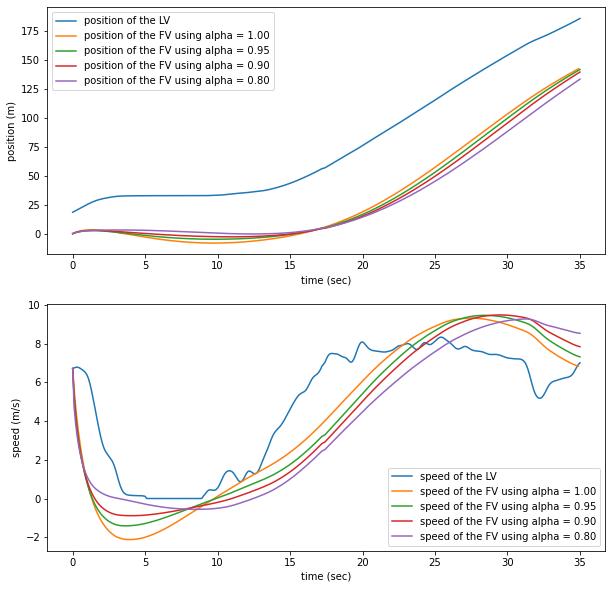

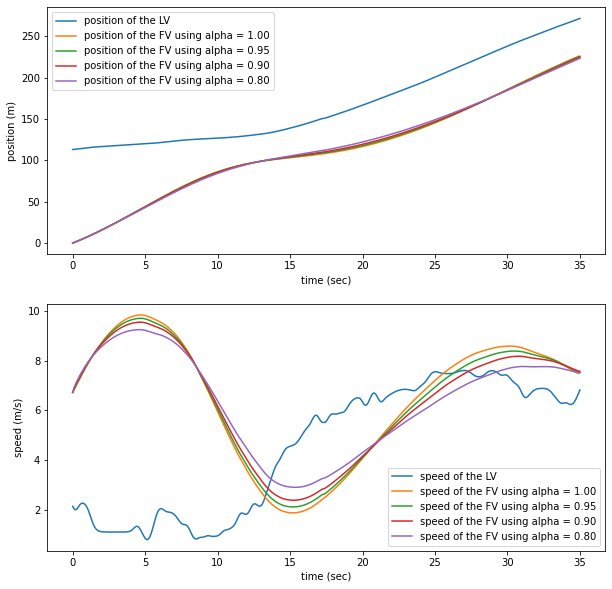

In [7]:
number_of_car = car_data['nthcar'].nunique()
number_of_car
# len(number_of_car) 

1000

## group by car 

In [8]:
car_data.columns

Index(['time', 'nthcar', 'speed', 'spaceheadway', 'accelaretion',
       'relativevelocity'],
      dtype='object')

In [9]:
max_data_per_car = car_data.groupby(["nthcar"])[['speed', 'spaceheadway', 'accelaretion']].max() 
max_data_per_car

,speed,spaceheadway,accelaretion
nthcar,,,
1,8.6408,25.121,2.5426
2,7.0220,19.011,1.8745
3,9.1056,20.614,2.0629
4,7.6297,23.374,2.6401
5,8.3221,28.568,2.5519
...,...,...,...
996,6.1449,13.498,2.7500
997,6.3448,16.741,1.8132
998,11.0890,22.591,4.9512


In [10]:
# data_per_car = car_data.groupby(["nthcar"]).agg(['max','min','max'])
data_per_car = car_data.groupby(["nthcar"])[['speed', 'spaceheadway', 'accelaretion']].agg(maxspeed=('speed', max), minspaceheadway=('spaceheadway', 'min'), maxaccelaretion=('accelaretion', 'max'))
data_per_car 


,maxspeed,minspaceheadway,maxaccelaretion
nthcar,,,
1,8.6408,7.36450,2.5426
2,7.0220,8.12970,1.8745
3,9.1056,8.60450,2.0629
4,7.6297,10.76100,2.6401
5,8.3221,7.92430,2.5519
...,...,...,...
996,6.1449,4.45470,2.7500
997,6.3448,7.12020,1.8132
998,11.0890,8.08920,4.9512


In [11]:
data_per_car = car_data.groupby(["nthcar"]).agg(max_speed=('speed', max), min_spaceheadway=('spaceheadway', 'min'), max_accelaretion=('accelaretion', 'max'),min_accelaretion=('accelaretion', 'min'))
data_per_car 


,max_speed,min_spaceheadway,max_accelaretion,min_accelaretion
nthcar,,,,
1,8.6408,7.36450,2.5426,-2.6997
2,7.0220,8.12970,1.8745,-2.7629
3,9.1056,8.60450,2.0629,-4.0318
4,7.6297,10.76100,2.6401,-3.5603
5,8.3221,7.92430,2.5519,-4.5046
...,...,...,...,...
996,6.1449,4.45470,2.7500,-2.3499
997,6.3448,7.12020,1.8132,-4.1000
998,11.0890,8.08920,4.9512,-2.8436


In [12]:
data_per_car.describe()

,max_speed,min_spaceheadway,max_accelaretion,min_accelaretion
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.295979,10.522583,2.344379,-2.904627
std,1.666084,4.596472,0.337555,0.659538
min,5.338800,-1.959300,0.997750,-4.837500
25%,9.145150,7.669850,2.137475,-3.344200
50%,10.233500,9.699900,2.349050,-2.853300
75%,11.372250,12.387500,2.568975,-2.399400
max,17.981000,34.078000,5.142500,-1.211900


In [13]:
# sns.lmplot(x='time', y='speed', data = car_data[car_data['nthcar']==1]) 

In [14]:
# sns.regplot(x='time', y='speed', data = car_data) 
# sns.regplot(x='time', y='speed', data = car_data[car_data['nthcar']==1]) 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [16]:
max_acceleration_per_car = car_data.groupby(["nthcar"])['accelaretion'].max() 
max_acceleration_per_car

nthcar
1       2.5426
2       1.8745
3       2.0629
4       2.6401
5       2.5519
         ...  
996     2.7500
997     1.8132
998     4.9512
999     2.1096
1000    1.9300
Name: accelaretion, Length: 1000, dtype: float64

In [17]:
print(np.mean(max_acceleration_per_car),np.std(max_acceleration_per_car))
# plt.hist(max_acceleration_per_car,bins=50) 

2.3443786499999986 0.33738654925274913


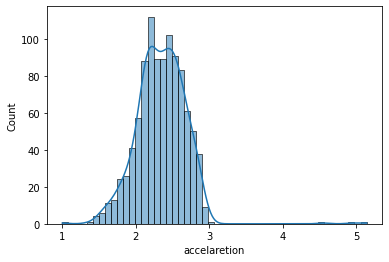

In [18]:
sns.histplot(max_acceleration_per_car,bins=50, kde = True)

In [19]:
min_acceleration_per_car = car_data.groupby(["nthcar"])['accelaretion'].min()
print(np.mean(min_acceleration_per_car),np.std(min_acceleration_per_car))

-2.9046269000000002 0.6592080260633889


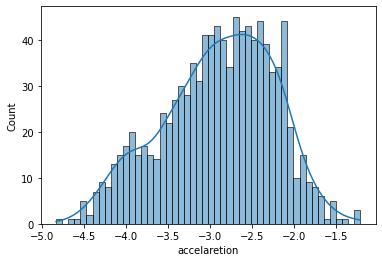

In [20]:
sns.histplot(min_acceleration_per_car,bins=50,kde = True)

# synthetic leader vehicl profile 

In [21]:
ya = 10
yb = 15
yc = 20
t1_steps = 90*10 # 60 sec 
# np.linspace()
nth_car_speed = np.concatenate((np.repeat(ya,t1_steps),np.linspace(ya,yb,t1_steps),np.repeat(yb,t1_steps),np.linspace(yb,yc,t1_steps),np.repeat(yc,t1_steps),np.linspace(yc,yb,t1_steps),np.repeat(yb,t1_steps),np.linspace(yb,ya,t1_steps),np.repeat(ya,t1_steps)),axis=0) 
time_span = np.linspace(0,len(nth_car_speed)*.01,len(nth_car_speed))



In [ ]:
import matplotlib.pyplot as plt

In [45]:
# ax.set_xticks(np.linspace(0,nps//10,nps//10+1))

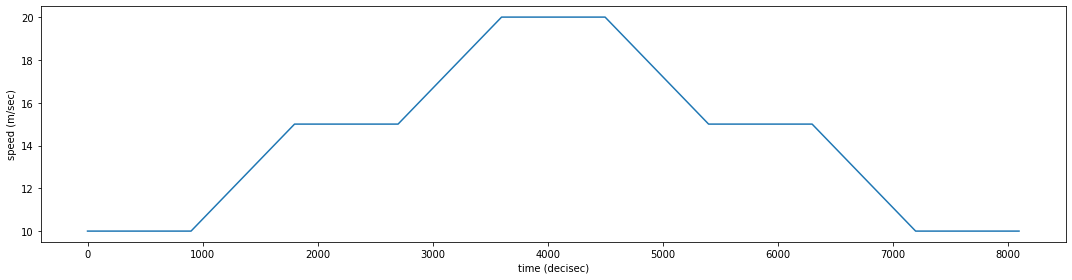

In [46]:
fig, ax = plt.subplots(figsize=(15,4))
nps = len(nth_car_speed)
ax.plot(range(0,len(nth_car_speed)),nth_car_speed)
ax.set_xlabel('time (decisec)')
ax.set_ylabel('speed (m/sec)')
fig.tight_layout() 

In [47]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = [0,5,9,10,15]
# y = [0,1,2,3,4]
# plt.plot(x,y)
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.show()